In [2]:
from PIL import Image

im = Image.open('jk.jpg')
im.size

(321, 113)

In [3]:
import numpy as np

im_pillow = np.asarray(im)
im_pillow.shape

(113, 321, 3)

In [4]:
import cv2 as cv

im_cv2 = cv.imread('jk.jpg')
type(im_cv2)

numpy.ndarray

In [5]:
im_cv2.shape

(113, 321, 3)

In [6]:
im_pillow[:,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [7]:
im_pillow_c1 = im_pillow[:,:,0]
im_pillow_c2 = im_pillow[:,:,1]
im_pillow_c3 = im_pillow[:,:,2]

In [8]:
zeros = np.zeros((im_pillow.shape[0],im_pillow.shape[1],1))
zeros.shape

(113, 321, 1)

In [9]:
im_pillow_c1.shape

(113, 321)

In [10]:
im_pillow_c1_3ch = np.concatenate((im_pillow_c1, zeros, zeros),axis=2)

AxisError: axis 2 is out of bounds for array of dimension 2

In [11]:
im_pillow_c1.shape, zeros.shape

((113, 321), (113, 321, 1))

### 方法一：使用 np.newaxis

In [12]:
im_pillow_c1 = im_pillow_c1[:,:,np.newaxis]
im_pillow_c1.shape

(113, 321, 1)

In [13]:
im_pillow_c1_3ch = np.concatenate((im_pillow_c1, zeros, zeros),axis=2)

In [14]:
im_pillow_c1_3ch.shape

(113, 321, 3)

In [15]:
im_pillow.shape

(113, 321, 3)

### 方法二：直接赋值

In [16]:
im_pillow_c2_3ch = np.zeros(im_pillow.shape)
im_pillow_c2_3ch[:,:,1] = im_pillow_c2

im_pillow_c3_3ch = np.zeros(im_pillow.shape)
im_pillow_c3_3ch[:,:,2] = im_pillow_c3

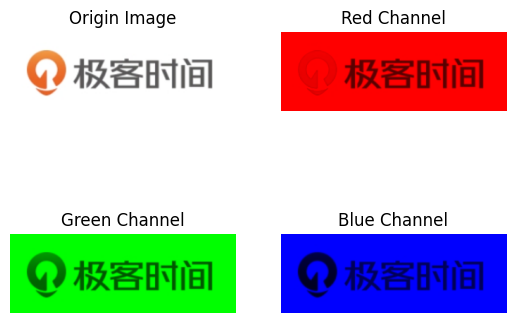

In [17]:
from matplotlib import pyplot as plt
plt.subplot(2, 2, 1)
plt.title('Origin Image')
plt.imshow(im_pillow)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Red Channel')
plt.imshow(im_pillow_c1_3ch.astype(np.uint8))
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title('Green Channel')
plt.imshow(im_pillow_c2_3ch.astype(np.uint8))
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('Blue Channel')
plt.imshow(im_pillow_c3_3ch.astype(np.uint8))
plt.axis('off')
plt.savefig('./rgb_pillow.png', dpi=150)

## 深拷贝（副本）与浅拷贝（视图）
np.array() 属于深拷贝，np.asarray() 则是浅拷贝。

In [18]:
from PIL import Image
import numpy as np

im = Image.open('jk.jpg')
im_pillow = np.asarray(im)
im_pillow[:,:,1:]=0

ValueError: assignment destination is read-only

In [19]:
im_pillow = np.array(im)
im_pillow[:,:,1:]=0

## Argmax Vs Argmin：求最大 / 最小值对应的索引

## Argsort：数组排序后返回原数组的索引

In [20]:
scores = np.random.rand(256, 256, 2)
scores[:,:,1] = 1 - scores[:,:,0]

In [21]:
scores

array([[[0.72792554, 0.27207446],
        [0.86393625, 0.13606375],
        [0.89090283, 0.10909717],
        ...,
        [0.71140351, 0.28859649],
        [0.0540203 , 0.9459797 ],
        [0.32017783, 0.67982217]],

       [[0.51668748, 0.48331252],
        [0.19489799, 0.80510201],
        [0.38687671, 0.61312329],
        ...,
        [0.12986715, 0.87013285],
        [0.3918269 , 0.6081731 ],
        [0.74782853, 0.25217147]],

       [[0.43816625, 0.56183375],
        [0.77994057, 0.22005943],
        [0.44800122, 0.55199878],
        ...,
        [0.42767822, 0.57232178],
        [0.36171035, 0.63828965],
        [0.57130472, 0.42869528]],

       ...,

       [[0.16742908, 0.83257092],
        [0.411929  , 0.588071  ],
        [0.34495904, 0.65504096],
        ...,
        [0.80112029, 0.19887971],
        [0.23830965, 0.76169035],
        [0.50991358, 0.49008642]],

       [[0.8950677 , 0.1049323 ],
        [0.5332825 , 0.4667175 ],
        [0.18843744, 0.81156256],
        .

In [22]:
scores.shape

(256, 256, 2)

In [40]:
scores[:,:,0] > scores[:,:,1], (scores[:,:,0] < scores[:,:,1]).astype(int)

(array([[ True,  True,  True, ...,  True, False, False],
        [ True, False, False, ..., False, False,  True],
        [False,  True, False, ..., False, False,  True],
        ...,
        [False, False, False, ...,  True, False,  True],
        [ True,  True, False, ..., False,  True, False],
        [False,  True,  True, ...,  True, False, False]]),
 array([[0, 0, 0, ..., 0, 1, 1],
        [0, 1, 1, ..., 1, 1, 0],
        [1, 0, 1, ..., 1, 1, 0],
        ...,
        [1, 1, 1, ..., 0, 1, 0],
        [0, 0, 1, ..., 1, 0, 1],
        [1, 0, 0, ..., 0, 1, 1]]))

In [33]:
mask = (scores[:,:,0] < scores[:,:,1]).astype(int)
mask

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1]])

In [36]:
mask=np.argmax(scores,axis=2)
mask

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [34]:
scores.shape

(256, 256, 2)